In [185]:
import os.path
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from scipy import stats
import seaborn as sns
import math
import statsmodels.api as sm
from statsmodels.tsa import stattools
from statsmodels.tsa import arima_model
from scipy.special import boxcox1p
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
CSV_EDA_PATH = '../datasources/eda/'
POL_CODES = [7, 6001, 5, 10, 1, 8]
POL_NAMES = {7: "O3", 6001: "PM2.5", 5: "PM10", 10: "CO", 1: "SO2", 8: "NO2"}

In [52]:
df = pd.read_csv(os.path.join(CSV_EDA_PATH, "O3.csv"), parse_dates=True, index_col='DatetimeEnd')

In [53]:
df.head(10)

,Unnamed: 0,Countrycode,AirQualityStation,SamplingProcess,Concentration,SamplingProces,AirPollutantCode,Longitude,Latitude,Altitude,AirQualityStationType,AirQualityStationArea
DatetimeEnd,,,,,,,,,,,,
2013-01-01 01:00:00+01:00,0,NL,STA-NL00003,SPP-NL_A_UV-P_thermo49i,35.0,SPP-NL_A_UV-P_thermo49i,7,4.943822,52.389314,1.0,background,urban
2013-01-01 01:00:00+01:00,1,NL,STA-NL00003,SPP-NL_A_chemi_02144,35.0,SPP-NL_A_chemi_02144,7,4.943822,52.389314,1.0,background,urban
2013-01-01 01:00:00+01:00,2,NL,STA-NL00003,SPP-NL_A_chemi_02144,35.0,SPP-NL_A_chemi_02144,8,4.943822,52.389314,1.0,background,urban
2013-01-01 02:00:00+01:00,3,NL,STA-NL00003,SPP-NL_A_UV-P_thermo49i,41.0,SPP-NL_A_UV-P_thermo49i,7,4.943822,52.389314,1.0,background,urban
2013-01-01 02:00:00+01:00,4,NL,STA-NL00003,SPP-NL_A_chemi_02144,41.0,SPP-NL_A_chemi_02144,7,4.943822,52.389314,1.0,background,urban
2013-01-01 02:00:00+01:00,5,NL,STA-NL00003,SPP-NL_A_chemi_02144,41.0,SPP-NL_A_chemi_02144,8,4.943822,52.389314,1.0,background,urban
2013-01-01 03:00:00+01:00,6,NL,STA-NL00003,SPP-NL_A_UV-P_thermo49i,41.0,SPP-NL_A_UV-P_thermo49i,7,4.943822,52.389314,1.0,background,urban
2013-01-01 03:00:00+01:00,7,NL,STA-NL00003,SPP-NL_A_chemi_02144,41.0,SPP-NL_A_chemi_02144,7,4.943822,52.389314,1.0,background,urban
2013-01-01 03:00:00+01:00,8,NL,STA-NL00003,SPP-NL_A_chemi_02144,41.0,SPP-NL_A_chemi_02144,8,4.943822,52.389314,1.0,background,urban


In [59]:
df.drop(df[df['AirPollutantCode'] == 8].index, axis=0, inplace=True)

KeyboardInterrupt: 

In [58]:
df.head(10)

,Unnamed: 0,Countrycode,AirQualityStation,SamplingProcess,Concentration,SamplingProces,AirPollutantCode,Longitude,Latitude,Altitude,AirQualityStationType,AirQualityStationArea
DatetimeEnd,,,,,,,,,,,,
2013-01-01 01:00:00+01:00,0,NL,STA-NL00003,SPP-NL_A_UV-P_thermo49i,35.0,SPP-NL_A_UV-P_thermo49i,7,4.943822,52.389314,1.0,background,urban
2013-01-01 01:00:00+01:00,1,NL,STA-NL00003,SPP-NL_A_chemi_02144,35.0,SPP-NL_A_chemi_02144,7,4.943822,52.389314,1.0,background,urban
2013-01-01 01:00:00+01:00,2,NL,STA-NL00003,SPP-NL_A_chemi_02144,35.0,SPP-NL_A_chemi_02144,8,4.943822,52.389314,1.0,background,urban
2013-01-01 02:00:00+01:00,3,NL,STA-NL00003,SPP-NL_A_UV-P_thermo49i,41.0,SPP-NL_A_UV-P_thermo49i,7,4.943822,52.389314,1.0,background,urban
2013-01-01 02:00:00+01:00,4,NL,STA-NL00003,SPP-NL_A_chemi_02144,41.0,SPP-NL_A_chemi_02144,7,4.943822,52.389314,1.0,background,urban
2013-01-01 02:00:00+01:00,5,NL,STA-NL00003,SPP-NL_A_chemi_02144,41.0,SPP-NL_A_chemi_02144,8,4.943822,52.389314,1.0,background,urban
2013-01-01 03:00:00+01:00,6,NL,STA-NL00003,SPP-NL_A_UV-P_thermo49i,41.0,SPP-NL_A_UV-P_thermo49i,7,4.943822,52.389314,1.0,background,urban
2013-01-01 03:00:00+01:00,7,NL,STA-NL00003,SPP-NL_A_chemi_02144,41.0,SPP-NL_A_chemi_02144,7,4.943822,52.389314,1.0,background,urban
2013-01-01 03:00:00+01:00,8,NL,STA-NL00003,SPP-NL_A_chemi_02144,41.0,SPP-NL_A_chemi_02144,8,4.943822,52.389314,1.0,background,urban


In [15]:
df.drop(columns=['Unnamed: 0', 'AirPollutantCode' ], axis=1, inplace=True)

Index(['Unnamed: 0', 'Countrycode', 'AirQualityStation', 'SamplingProcess',
       'Concentration', 'DatetimeEnd', 'SamplingProces', 'AirPollutantCode',
       'Longitude', 'Latitude', 'Altitude', 'AirQualityStationType',
       'AirQualityStationArea'],
      dtype='object')

In [76]:
df_station_sample = df[(df['AirQualityStation'] == 'STA-NL00301') & (df['SamplingProcess'] == 'SPP-NL_A_UV-P_thermo49i')]
df_station_sample.drop(columns=['Unnamed: 0', 'AirPollutantCode' ], axis=1, inplace=True)
df_station_sample.shape

(85432, 10)

In [239]:
def plot_ts(ts : pd.DataFrame, predict: pd.DataFrame = None, date_from = None, date_to = None, title = "", legend = ""):
    fig = plt.figure(figsize=(21, 6))
    ax = fig.add_subplot(111)
    if date_from is not None and date_to is not None:
        ts.loc[date_from:date_to].plot(xlabel="Date", ylabel="Concentration", title=title,  y='Concentration', c='tab:blue', ax=ax)
        if predict is not None:
            predict.loc[date_from:date_to].plot(c='tab:red', ax=ax)
    else:
        ts.plot(xlabel="Date", ylabel="Concentration", title=title,  y='Concentration', c='tab:blue', ax=ax)
        if predict is not None:
            predict.plot(c='tab:red', ax=ax)
    plt.legend(legend)
    plt.show()

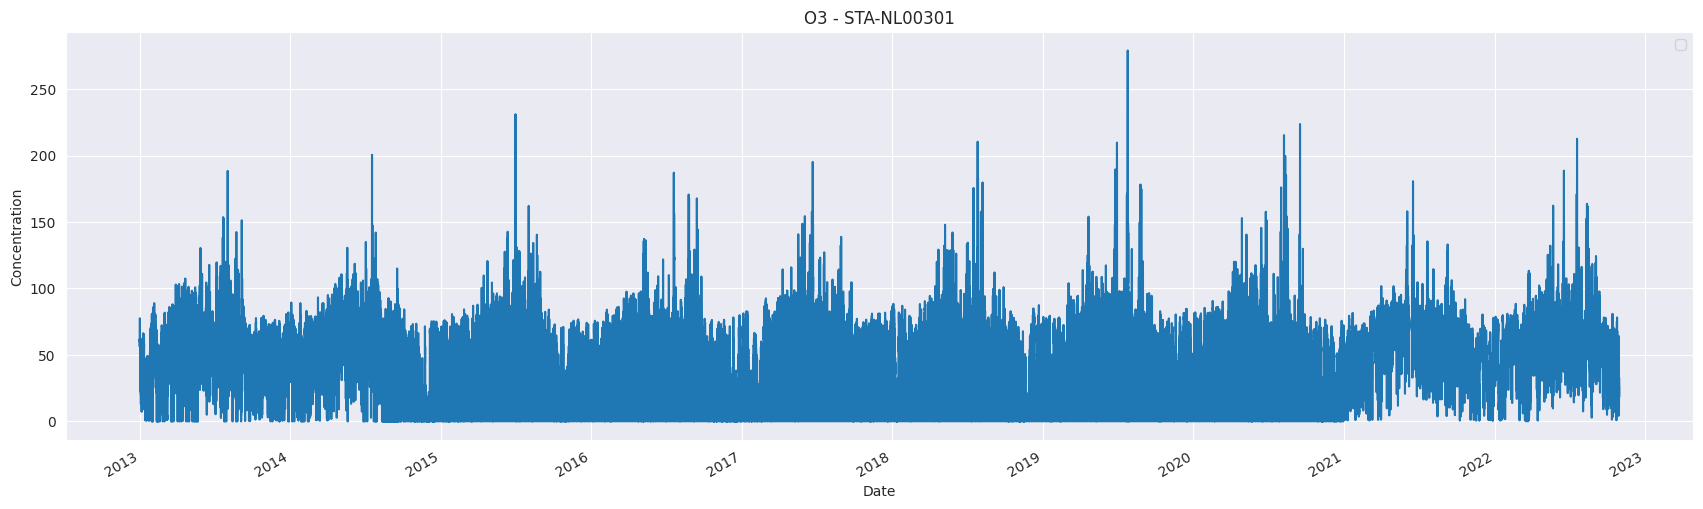

In [240]:
plot_ts(df_station_sample, title=f'ALL O3 - {"STA-NL00301"}')

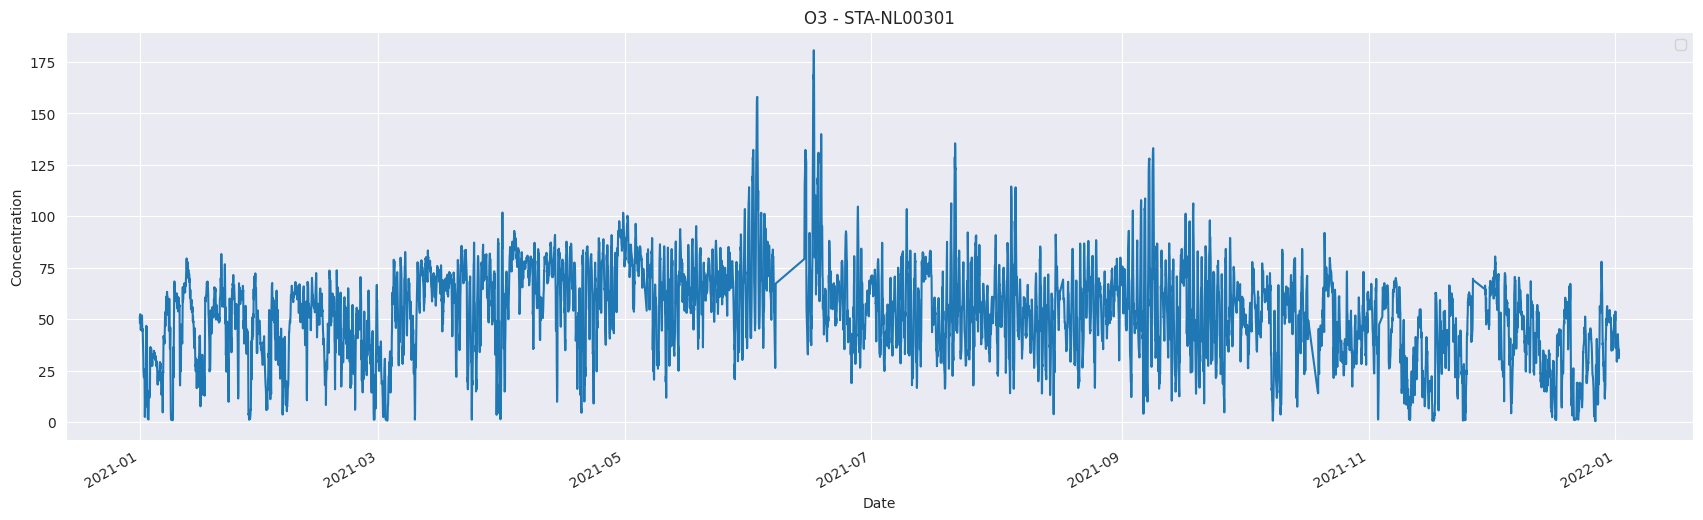

In [241]:
plot_ts(df_station_sample, date_from='2021-01-01', date_to='2022-01-01', title=f'YEAR O3 - {"STA-NL00301"}')

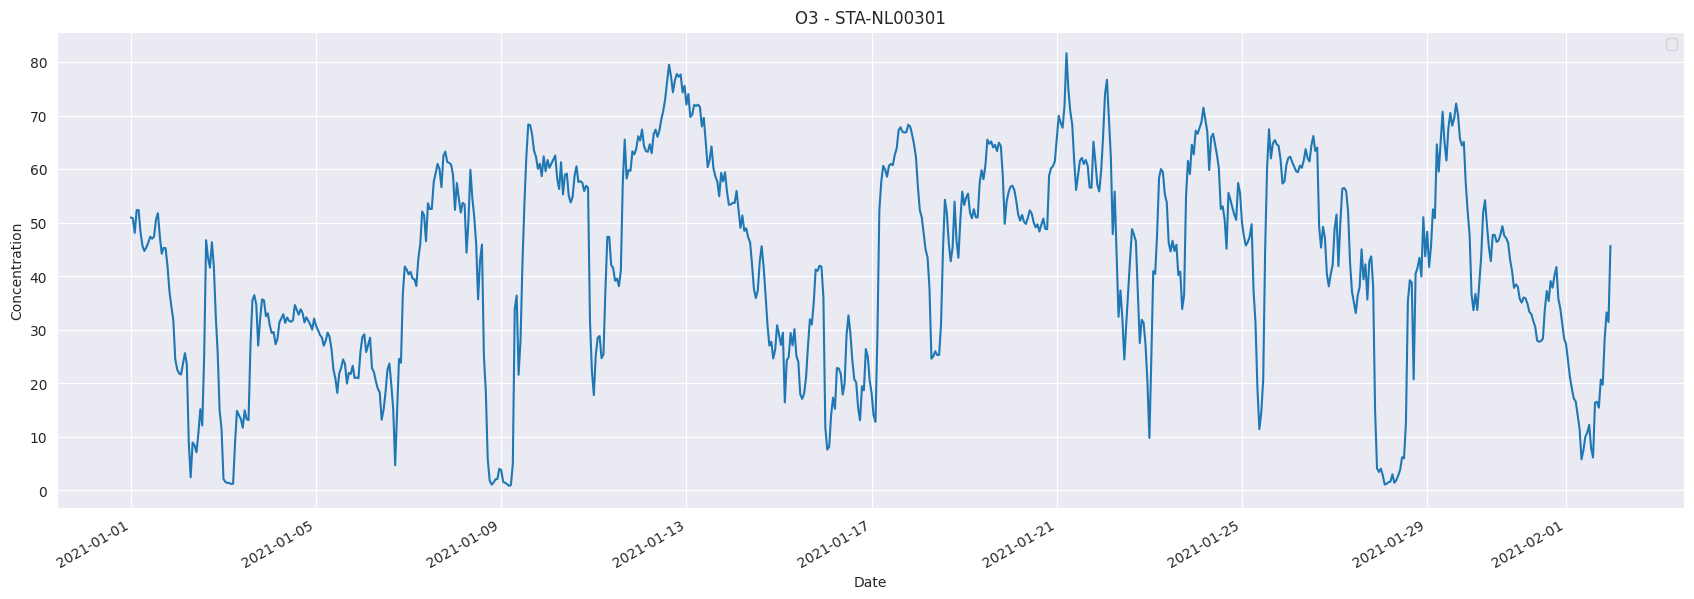

In [94]:
plot_ts(df_station_sample, date_from='2021-01-01', date_to='2021-02-01', title=f'MONTH O3 - {"STA-NL00301"}')

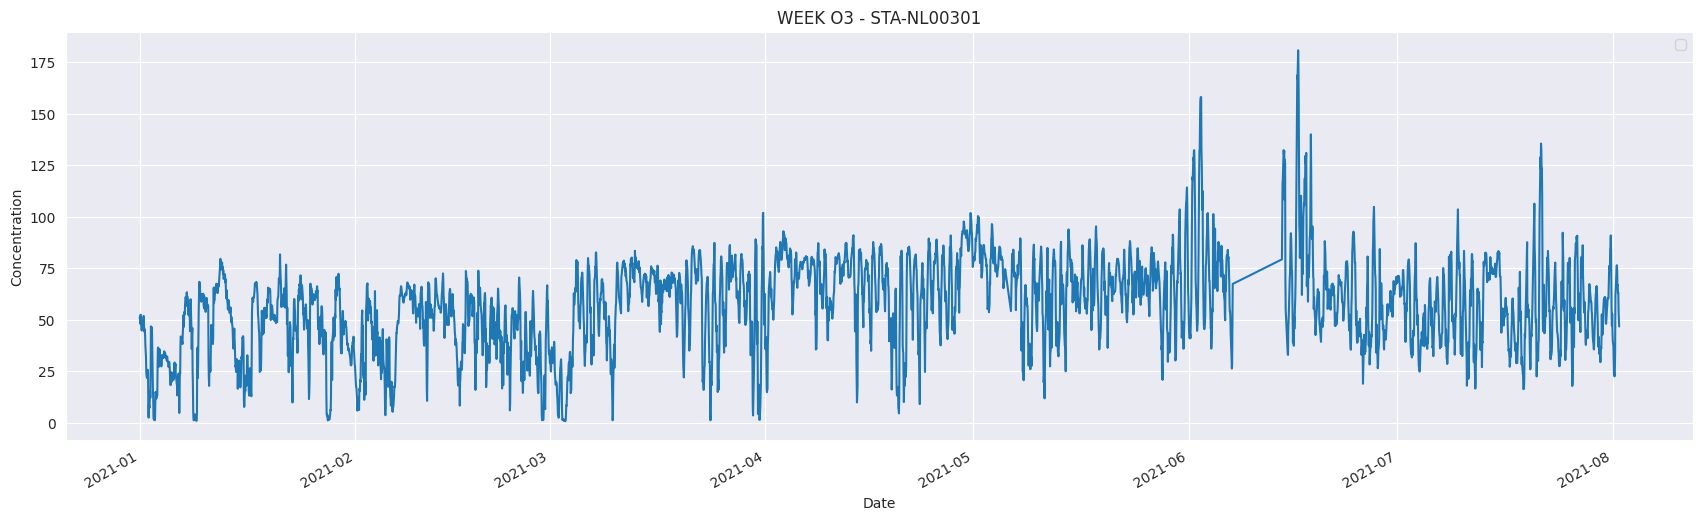

In [273]:
plot_ts(df_station_sample, date_from='2021-01-01', date_to='2021-08-01', title=f'WEEK O3 - {"STA-NL00301"}')

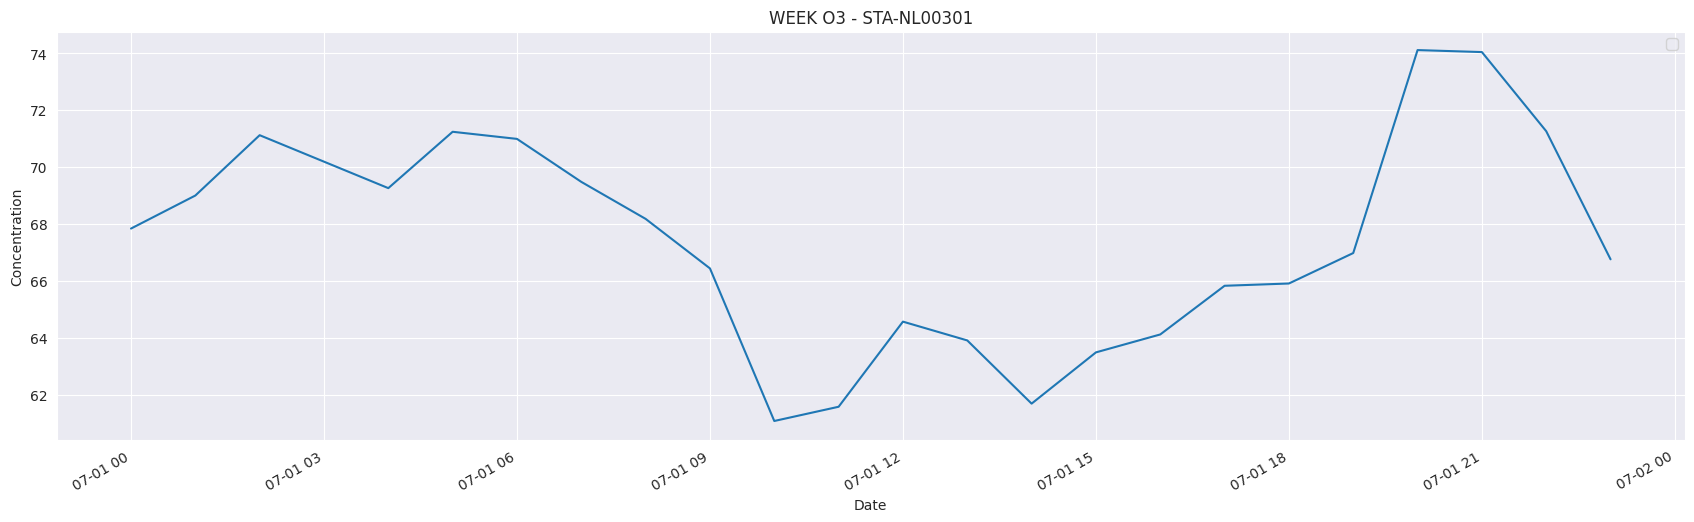

In [279]:
plot_ts(df_station_sample, date_from='2021-07-01', date_to='2021-07-01', title=f'WEEK O3 - {"STA-NL00301"}')

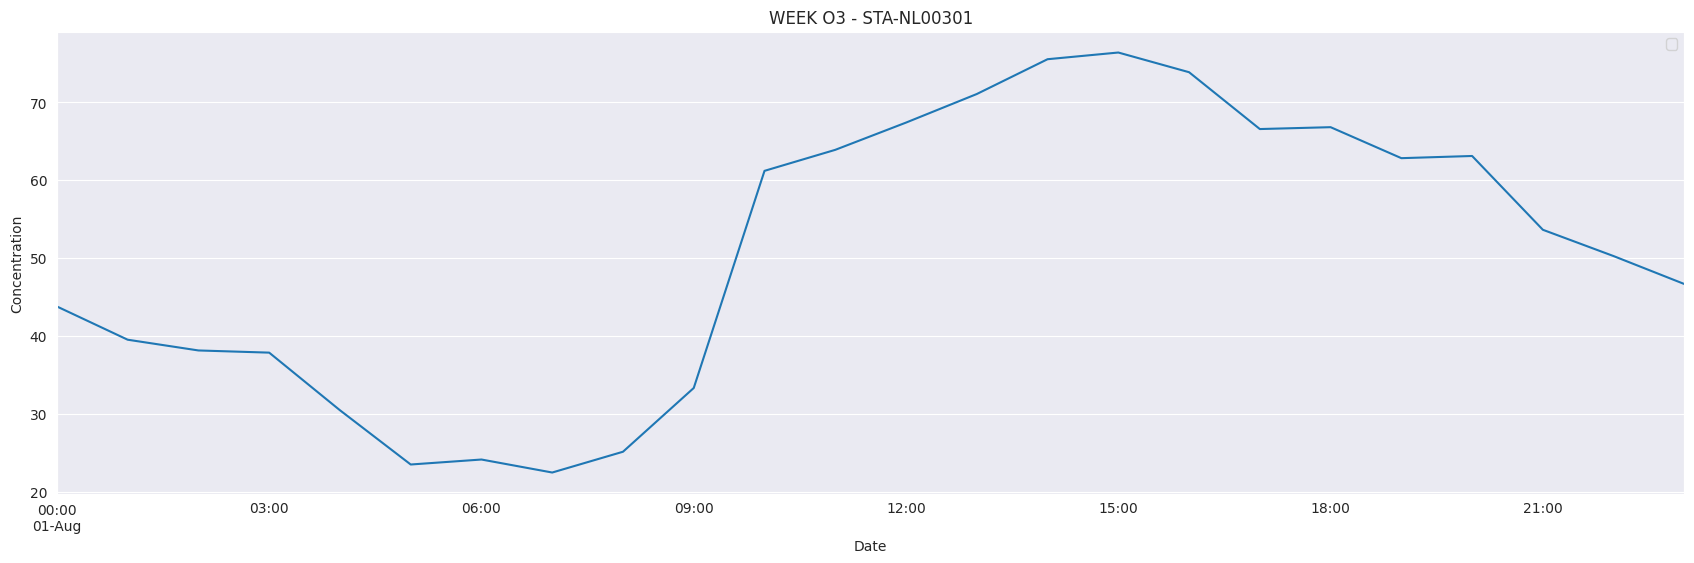

In [280]:
plot_ts(df_station_sample, date_from='2021-08-01', date_to='2021-08-01', title=f'WEEK O3 - {"STA-NL00301"}')

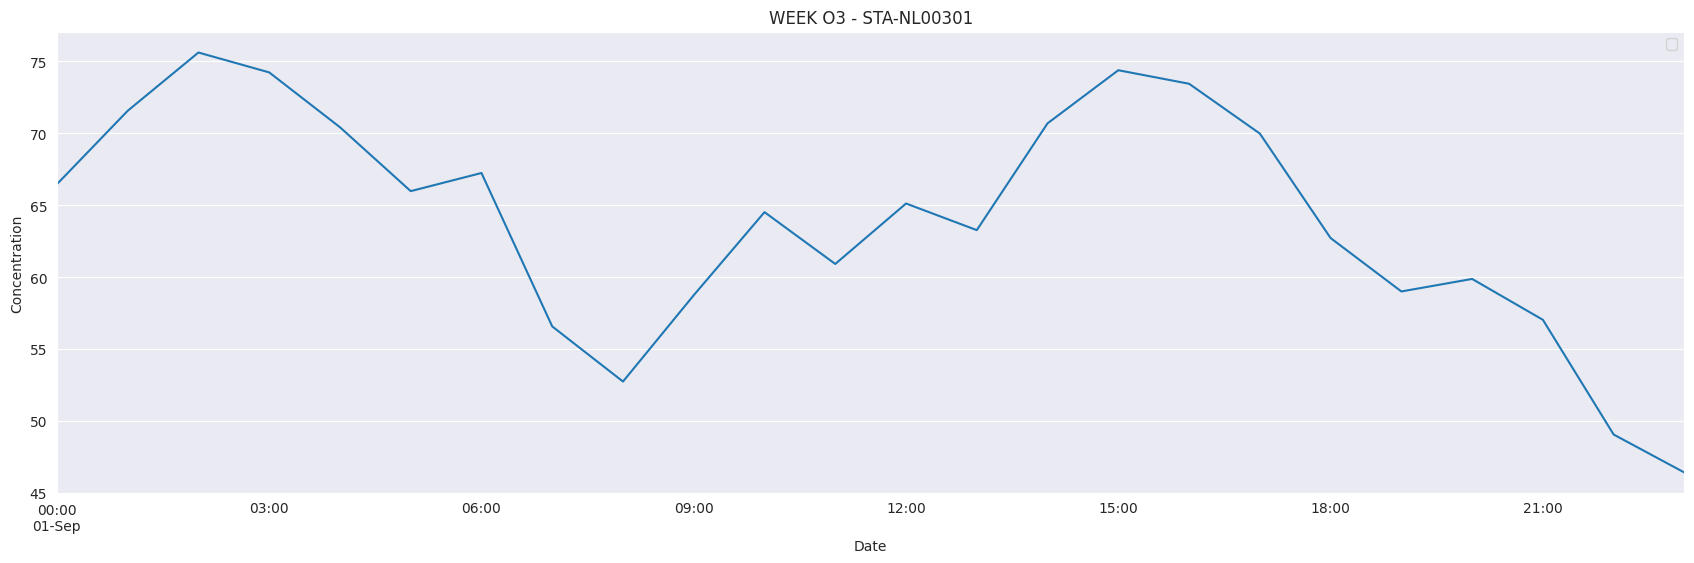

In [281]:
plot_ts(df_station_sample, date_from='2021-09-01', date_to='2021-09-01', title=f'WEEK O3 - {"STA-NL00301"}')

In [47]:
def check_stationarity_dick_fuller(series):
    result = adfuller(series.values)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('maximal Lag: %f' % result[2])
    print('Critical Values:')
    if len(result) >4 and result[4] is not None:
        for key, value in result[4].items():
            print('\t%s: %.3f' % (key, value))
    if (result[1] <= 0.05): # & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

def check_stationarity_kpss(series):
    result = kpss(series.values)
    print('KPSS Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('maximal Lag: %f' % result[2])
    print('Critical Values:')
    if  len(result) >4 and result[4] is not None:
        for key, value in result[4].items():
            print('\t%s: %.3f' % (key, value))
    if (result[1] > 0.05): #& (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [160]:
df_station_sample[df_station_sample['Concentration'].isna()] = 0

In [161]:
check_stationarity_dick_fuller(df_station_sample['Concentration'])

ADF Statistic: -19.396242
p-value: 0.000000
maximal Lag: 65.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Stationary


In [50]:
check_stationarity_kpss(df_station_sample['Concentration'])

KPSS Statistic: 1.644468
p-value: 0.010000
maximal Lag: 144.000000
Critical Values:
Non-stationary


ADF-тест говорит о стационарности, но KPSS-тест говорит об обратном. Следовательно, необходимо ряд продифференцировать

In [104]:
def apply_best_box_cox(ts: pd.DataFrame, plots_needed = False):
    df_station_sample.loc[ts['Concentration'] < 0, 'Concentration'] = 0
    ts_boxcox = deepcopy(ts)
    pt = PowerTransformer(method='yeo-johnson')
    pt.fit(ts_boxcox['Concentration'].array.reshape(-1, 1))
    print(f'Best lambda: {pt.lambdas_}')
    ts_boxcox['Concentration'] = boxcox1p(ts_boxcox['Concentration'], pt.lambdas_[0])
    if plots_needed:
        plot_ts(ts_boxcox)
    return ts_boxcox

In [250]:
def apply_differencing(ts: pd.DataFrame, shift_type: str, shift_value: int, source_plots_needed = False, dif_plot_needed = False) -> pd.DataFrame:
    offset = None
    p = 0
    if shift_type == 'Y':
        offset = pd.DateOffset(years = shift_value)
        p = 365*24
    elif shift_type == 'M':
        offset = pd.DateOffset(months = shift_value)
        p = 30*24
    elif shift_type == 'W':
        offset = pd.DateOffset(weeks = shift_value)
        p = 7*24
    elif shift_type == 'D':
        offset = pd.DateOffset(days = shift_value)
        p = 1*24
    else:
        offset = pd.DateOffset(hours = shift_value)
        p = 1

    ts_dif = (ts['Concentration'] - ts['Concentration'].shift(fill_value =0, freq = offset))[p:]
    if source_plots_needed:
        plot_ts(ts, title=f'SOURCE TS')
    if dif_plot_needed:
        plot_ts(ts_dif, title=f'TS DIF BY {shift_value} {shift_type}')
    ts_dif = ts_dif.dropna()
    return ts_dif

In [271]:
def plot_acf_pacf(ts: pd.DataFrame, lags = 200):
    fig = plt.figure(figsize=(21, 7))
    ax1 = fig.add_subplot(211)
    sm.graphics.tsa.plot_acf(ts, auto_ylims=True, lags=lags, ax = ax1)
    ax2 = fig.add_subplot(212)
    sm.graphics.tsa.plot_pacf(ts, auto_ylims=True, lags=lags, ax=ax2, method='ols')
    plt.show()

In [253]:
def pre_analise(ts: pd.DataFrame, diffs_needed: [], is_box_cox_needed = False, source_plots_needed = False, dif_plot_needed = False, box_cox_plot_needed=False):
    ts_n = deepcopy(ts)
    if is_box_cox_needed:
        ts_n = apply_best_box_cox(ts_n, plots_needed=box_cox_plot_needed)
    source_plots_shown = False
    if diffs_needed is not None and len(diffs_needed) > 0:
        for dif in diffs_needed:
            ts_n = apply_differencing(ts=df_station_sample, shift_type=dif[0], shift_value=dif[1], source_plots_needed=(source_plots_needed and not source_plots_shown),
                                      dif_plot_needed=dif_plot_needed)
            source_plots_shown = True
    check_stationarity_dick_fuller(ts_n)
    check_stationarity_kpss(ts_n)
    plot_acf_pacf(ts_n)
    return ts_n

ADF Statistic: -23.852439
p-value: 0.000000
maximal Lag: 50.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Stationary
KPSS Statistic: 0.125772
p-value: 0.100000
maximal Lag: 148.000000
Critical Values:
Stationary


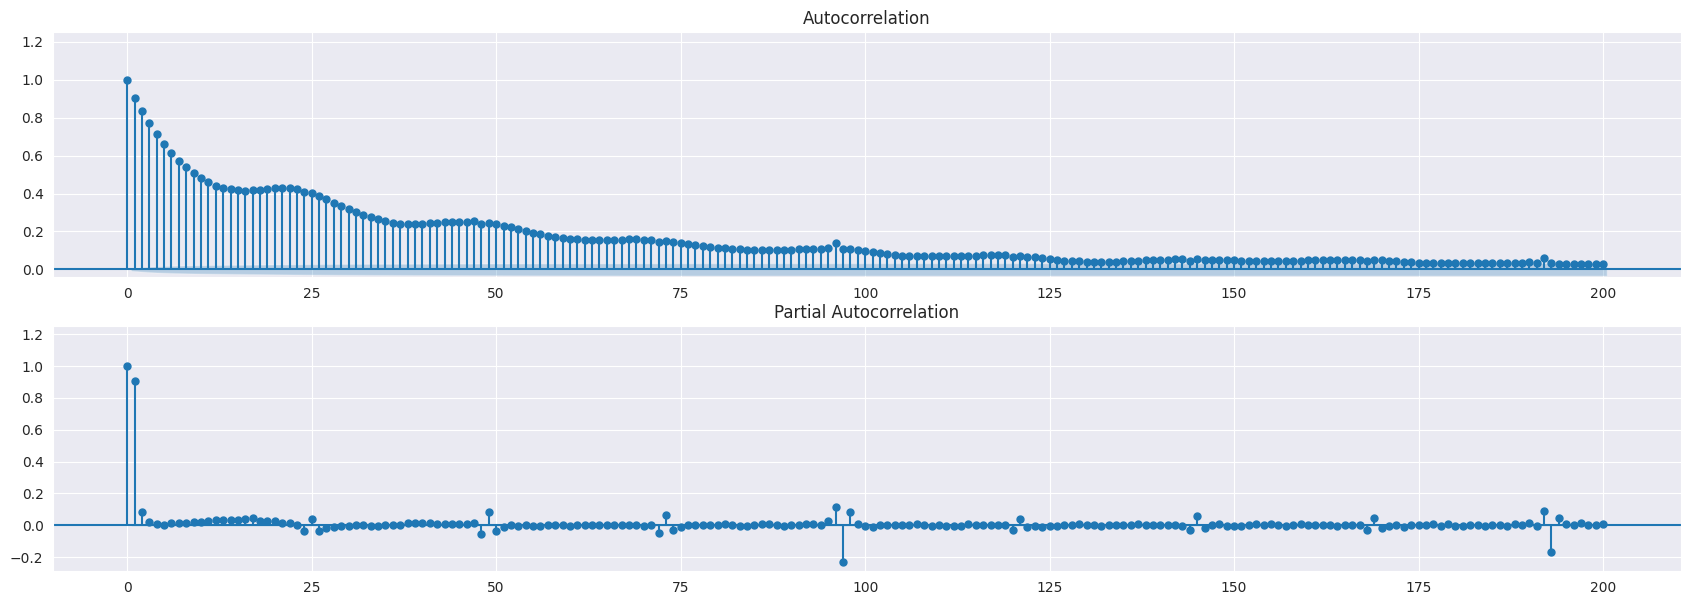

In [272]:
df_ss_dif_year = pre_analise(df_station_sample, [('Y', 1)])

ADF Statistic: -43.157994
p-value: 0.000000
maximal Lag: 65.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Stationary
KPSS Statistic: 0.009771
p-value: 0.100000
maximal Lag: 136.000000
Critical Values:
Stationary


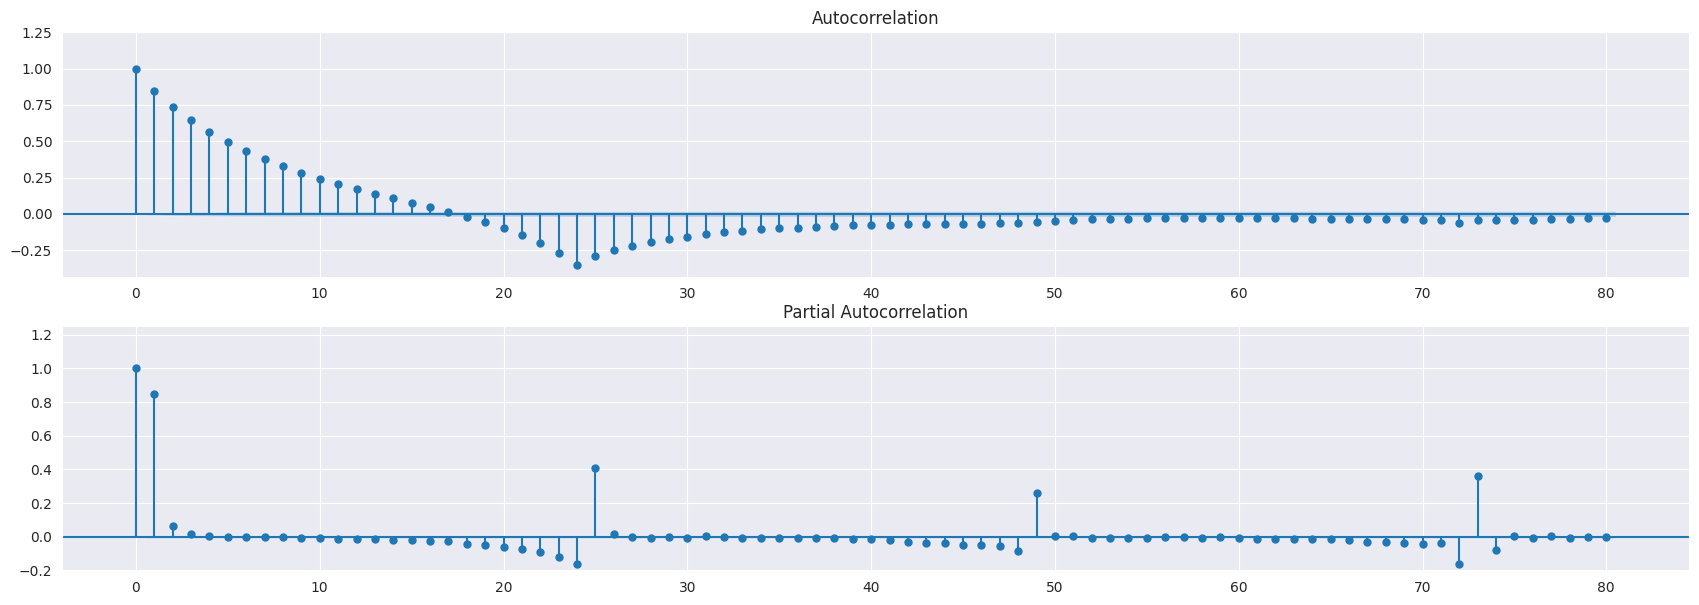

In [266]:
df_ss_dif_year_24d = pre_analize(df_station_sample, [('Y', 1), ('H', 24)])

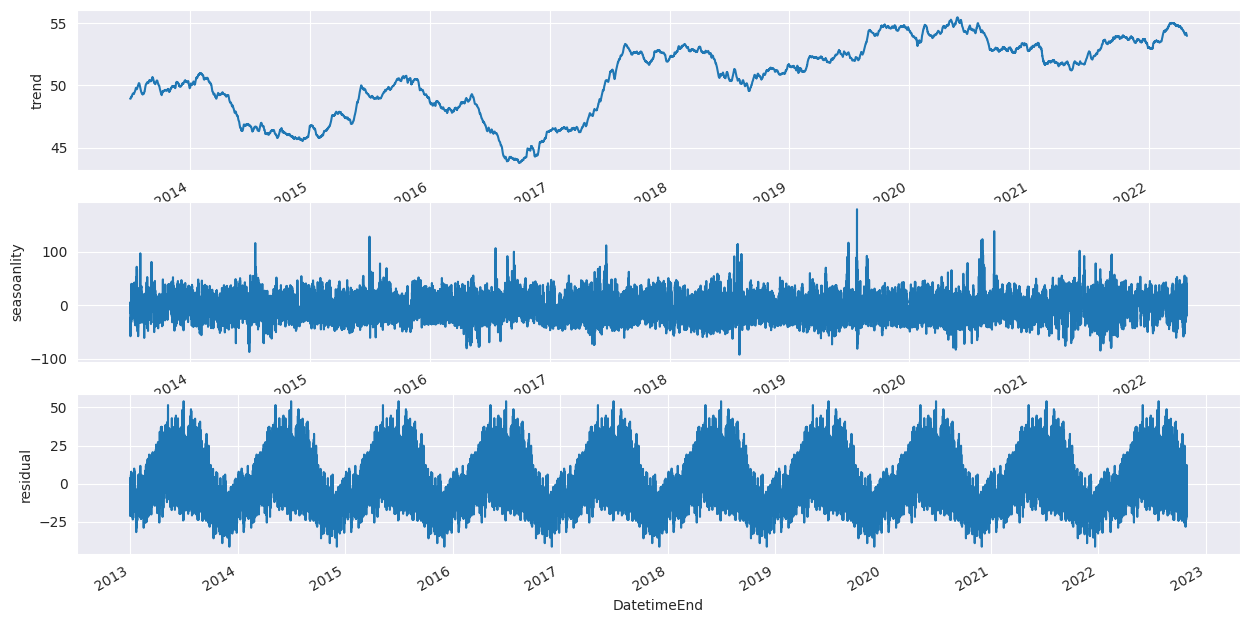

In [263]:
from statsmodels.tsa.seasonal import seasonal_decompose

res = seasonal_decompose(df_station_sample['Concentration'], model = "additive",period = 24*365)

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
res.trend.plot(ax=ax1,ylabel = "trend")
res.resid.plot(ax=ax2,ylabel = "seasonality")
res.seasonal.plot(ax=ax3,ylabel = "residual")
plt.show()

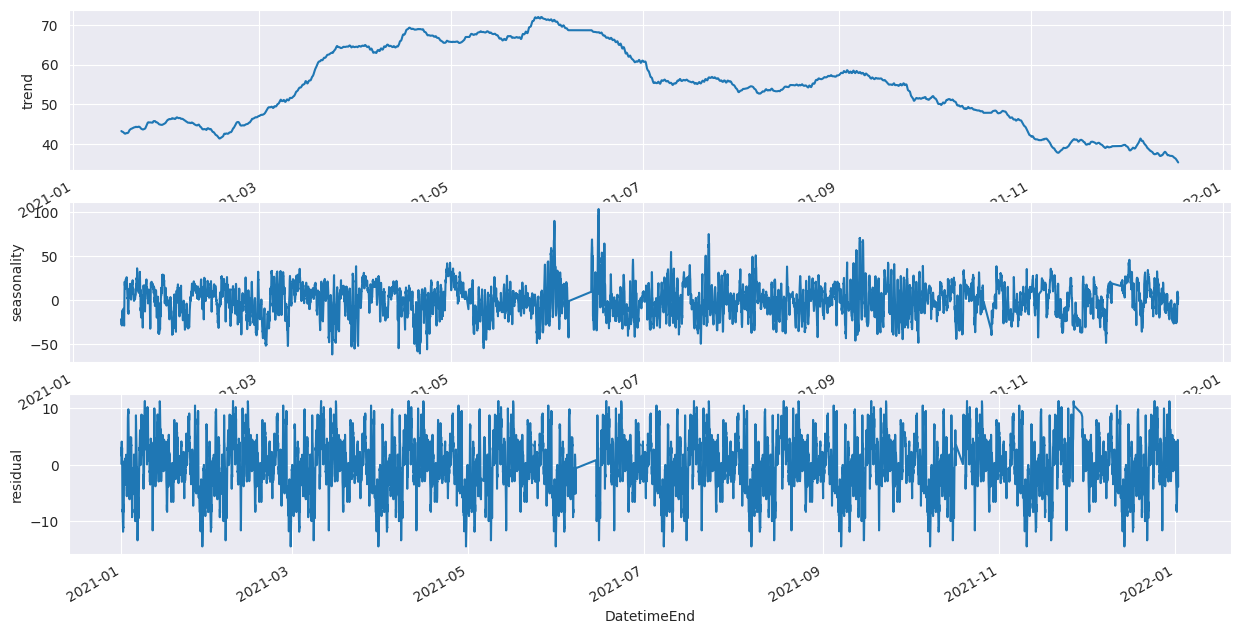

In [267]:
from statsmodels.tsa.seasonal import seasonal_decompose

res = seasonal_decompose(df_station_sample.loc['2021-01-01':'2022-01-01', 'Concentration'], model = "additive",period = 24*30)

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
res.trend.plot(ax=ax1,ylabel = "trend")
res.resid.plot(ax=ax2,ylabel = "seasonality")
res.seasonal.plot(ax=ax3,ylabel = "residual")
plt.show()

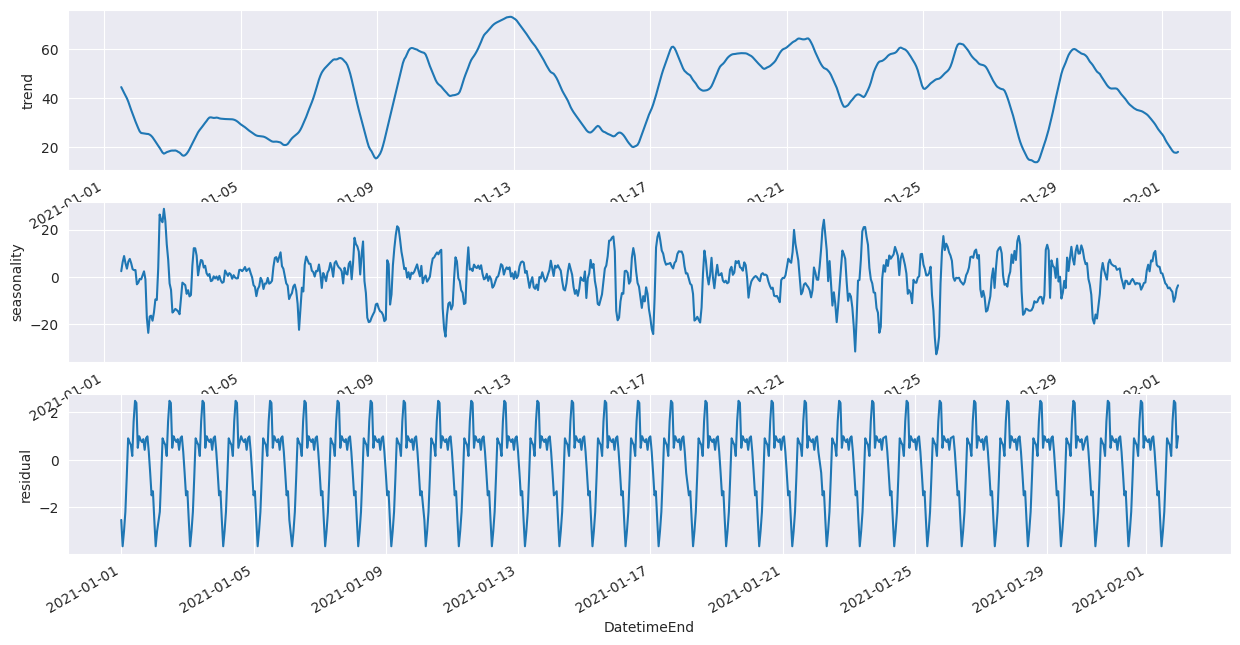

In [268]:
from statsmodels.tsa.seasonal import seasonal_decompose

res = seasonal_decompose(df_station_sample.loc['2021-01-01':'2021-02-01', 'Concentration'], model = "additive",period = 24)

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
res.trend.plot(ax=ax1,ylabel = "trend")
res.resid.plot(ax=ax2,ylabel = "seasonality")
res.seasonal.plot(ax=ax3,ylabel = "residual")
plt.show()

In [176]:
arima_mod00 = sm.tsa.ARIMA(df_ss_dif_year).fit()
print(arima_mod00.summary())

                               SARIMAX Results                                
Dep. Variable:          Concentration   No. Observations:                72726
Model:                          ARIMA   Log Likelihood             -348227.233
Date:                Sun, 18 Dec 2022   AIC                         696458.467
Time:                        16:25:35   BIC                         696476.856
Sample:                             0   HQIC                        696464.129
                              - 72726                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3277      0.108      3.041      0.002       0.116       0.539
sigma2       844.2761      3.694    228.556      0.000     837.036     851.516
Ljung-Box (L1) (Q):               64907.90   Jarque-

In [178]:
df_ss_dif_year.index[-1]

Timestamp('2022-10-29 19:00:00+0100', tz='pytz.FixedOffset(60)')

In [187]:
frc_arima = arima_mod00.predict(df_ss_dif_year.index[0], df_ss_dif_year.index[-1], dynamic=False)

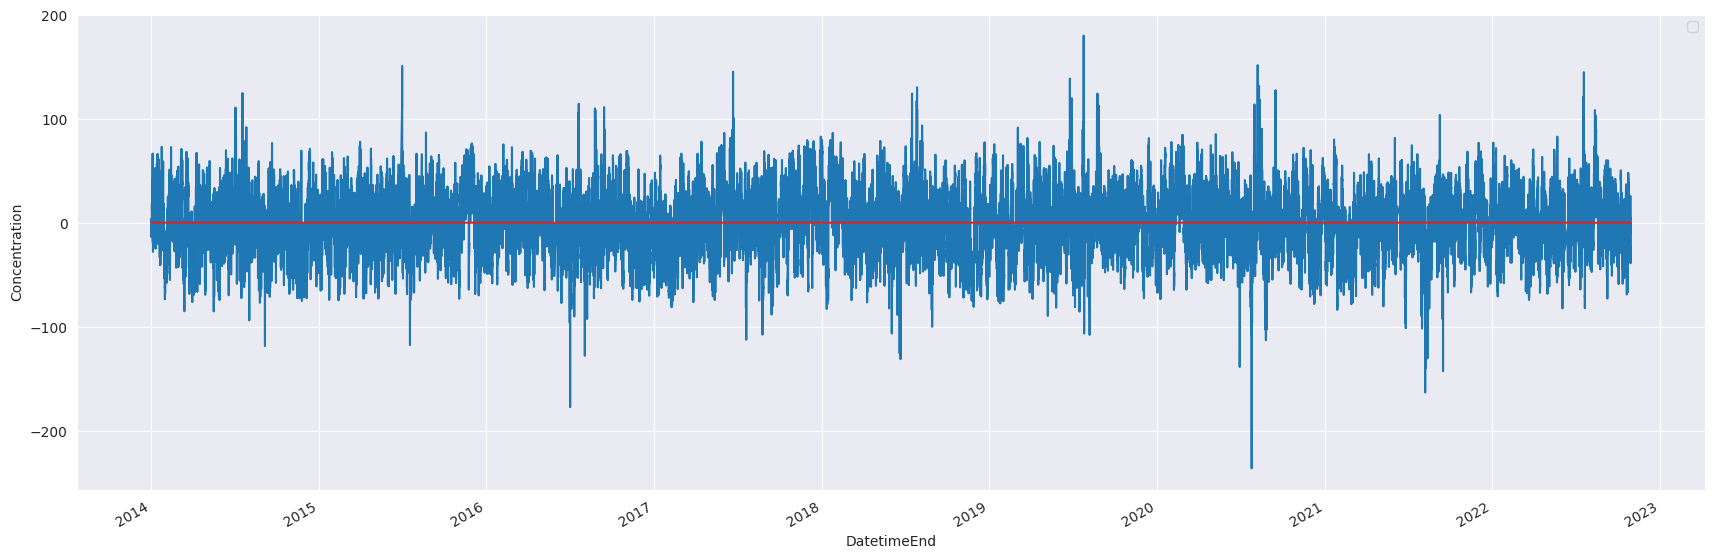

In [201]:
plot_ts(df_ss_dif_year, frc_arima)

In [203]:
# Let's train our first ARIMA (p, d, q)x(P, D, Q, s) model
arima_010_010 = sm.tsa.SARIMAX(endog = df_station_sample['Concentration'], order=(0, 0, 0), seasonal_order = (0,0,0,365*24)).fit()
print(arima_010_010.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.92283D+00    |proj g|=  1.26090D-04


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   1.858D-07   4.923D+00
  F =   4.9228249380241778     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


MemoryError: Unable to allocate 85.3 GiB for an array with shape (366, 366, 85432) and data type float64

In [ ]:

predict = arima_010_010.get_prediction()
predict_ci = predict.conf_int() # confidence interval


#  Dynamic predictions
# predict_dy = arima_010_010.get_prediction(dynamic=start_dt)
# predict_dy_ci = predict_dy.conf_int() # confidence interval

# Graph
fig, ax = plt.subplots()
npre = 4
ax.set(title='Concentration', xlabel='Date')

# Plot data points
df_station_sample['Concentration'].plot(ax=ax, style='o', label='Observed')

# Plot predictions
predict.predicted_mean.plot(ax=ax, style='r--', label='One-step-ahead forecast')
ax.fill_between(predict_ci.index,predict_ci.loc[:predict_ci.columns[0]], predict_ci.loc[:,predict_ci.columns[1]], color='r', alpha=0.1)
# predict_dy.predicted_mean.loc[start_dt:].plot(ax=ax, style='g', label='Dynamic forecast 2014-01')
# ci = predict_dy_ci.loc[start_dt:]
# ax.fill_between(ci.index, ci.loc[:,ci.columns[0]], ci.loc[:,ci.columns[1]], color='g', alpha=0.1)
legend = ax.legend(loc='lower right')

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(21, 2*8))
plot_acf(df_station_sample['Concentration'],lags=lag_acf, ax=ax[0])
plot_pacf(df_station_sample['Concentration'],lags=lag_pacf, ax=ax[1], method='ols')

ax[1].annotate('Strong correlation at lag = 1', xy=(1, 0.6),  xycoords='data',
            xytext=(0.17, 0.75), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

plt.tight_layout()
plt.show()